In [1]:
from src.data.dataset_functions import get_dataframei_onlymods
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
import functools

def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

#Die erste 5 Datensätze zu eine DataFrame, damit ich das in der Übung für die alle zeigen kann
spark = SparkSession.builder.getOrCreate()
#df1 = get_dataframei_onlymods(0)
df2 = get_dataframei_onlymods(1)
df3 = get_dataframei_onlymods(2)
df4 = get_dataframei_onlymods(3)
df5 = get_dataframei_onlymods(4)
df6 = get_dataframei_onlymods(5)
df7 = get_dataframei_onlymods(8)

unioned = unionAll([df2,df3,df4,df5,df6,df7])
unioned.show()

:: loading settings :: url = jar:file:/usr/local/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/vscode/.ivy2/cache
The jars for the packages stored in: /home/vscode/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-d2e89885-f52b-4c5b-917e-6a92b04c1efb;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 83ms :: artifacts dl 5ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	----------------------------------

providing ../data/raw/2022_place_canvas_history-000000000001.csv ...
../data/raw/2022_place_canvas_history-000000000001.csv is already in data/raw
providing ../data/raw/2022_place_canvas_history-000000000002.csv ...
../data/raw/2022_place_canvas_history-000000000002.csv is already in data/raw
providing ../data/raw/2022_place_canvas_history-000000000003.csv ...
../data/raw/2022_place_canvas_history-000000000003.csv is already in data/raw
providing ../data/raw/2022_place_canvas_history-000000000004.csv ...
../data/raw/2022_place_canvas_history-000000000004.csv is already in data/raw
providing ../data/raw/2022_place_canvas_history-000000000005.csv ...
../data/raw/2022_place_canvas_history-000000000005.csv is already in data/raw
providing ../data/raw/2022_place_canvas_history-000000000008.csv ...
../data/raw/2022_place_canvas_history-000000000008.csv is already in data/raw


+--------------------+----+----+----+----+------+-----------+
|             user_id|  x1|  y1|  x2|  y2|     t|pixel_color|
+--------------------+----+----+----+----+------+-----------+
|q+XjkQ6WRx0aBLtb2...|1349|1718|1424|1752|225170|    #000000|
|gS0DWvPgaiQkHvG4N...| 297|1750| 364|1813|218392|    #FFB470|
|m8NEcPbf5XRV5ppeu...| 298|1805| 329|1839|216904|    #FFB470|
|LKS2u3QL2N3Olv7rn...| 257|1736| 296|1780|217130|    #FFB470|
|q/Dk6lmcXm8bcDbNI...| 298|1770| 334|1803|216809|    #FFB470|
|HkR0yRQUJ1wsjh4Zo...| 251|1805| 296|1812|217236|    #FFF8B8|
|7JiQyrONpFJphvBEP...| 271|1835| 296|1859|217371|    #FFF8B8|
|gXOuxCyb/dslyRb5G...|  23|1523| 172|1792|235340|    #000000|
|Tqn87vyPxAHtPMu4x...|  51|1691| 154|1807|236381|    #000000|
|oPv1iZrj4UMjfhzOT...|  44|1652| 165|1899|235570|    #000000|
|wpjJ1TbSwZtj96n9Z...|1372|1472|1406|1497|290389|    #00CC78|
|Ps64FZelo7/8upEdC...|1373|1400|1419|1436|290389|    #2450A4|
|FJD0LHykwotIeUCO9...|1371|1438|1418|1472|290389|    #898D90|
|2U70JUf

In [2]:
unioned = unioned.drop('t')

In [3]:
import random

get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [4]:
amount_of_needed_colors_df5 = unioned.count() #Für die ersten 5 Datensätze für die Übung

In [5]:
color_list_df5 = get_colors(amount_of_needed_colors_df5) #Für die ersten 5 Datensätze für die Übung

In [6]:
import pandas as pd

unioned = unioned.drop('user_id').drop('pixel_color').collect()
index = 0 #Index der besagt welcher Index der Farbliste gneutzt werden soll
pandasMdf5 = pd.DataFrame() #Neues DataFrame erstellen, dass befüllt werden soll
pandasMdf5.insert(0,"x", [], True)
pandasMdf5.insert(1,"y", [], True)
pandasMdf5.insert(2,"pixel_color", [], True)
for row in unioned:
    color = color_list_df5[index] #Farbe für jeweiliges Quadrat wählen
    x1,y1,x2,y2 = list(row)
    for i in range(x1,x2+1): #zunächst obere Rahmenlinie erstellen
        #df.loc[len(df.index)] = [value1, value2, value3, ...]
        pandasMdf5.loc[len(pandasMdf5.index)] = [i,y1,color]
        #pandasM.loc(i,y1,color)
    for i in range(y1+1,y2+1): #linke Rahmenlinie
        pandasMdf5.loc[len(pandasMdf5.index)] = [x1,i,color]
        #pandasM.loc(x1,i,color)
    for i in range(y1+1,y2+1):
        pandasMdf5.loc[len(pandasMdf5.index)] = [x2,i,color]
        #pandasM.loc(x2,i,color)
    for i in range(x1+1,x2):
        pandasMdf5.loc[len(pandasMdf5.index)] = [i,y2,color]
        #pandasM.loc(i,y2,color)
    index+=1 #nächste Farbe betrachten
#DataFrame sollte mit allen nötigen Daten aufgefüllt worden sein

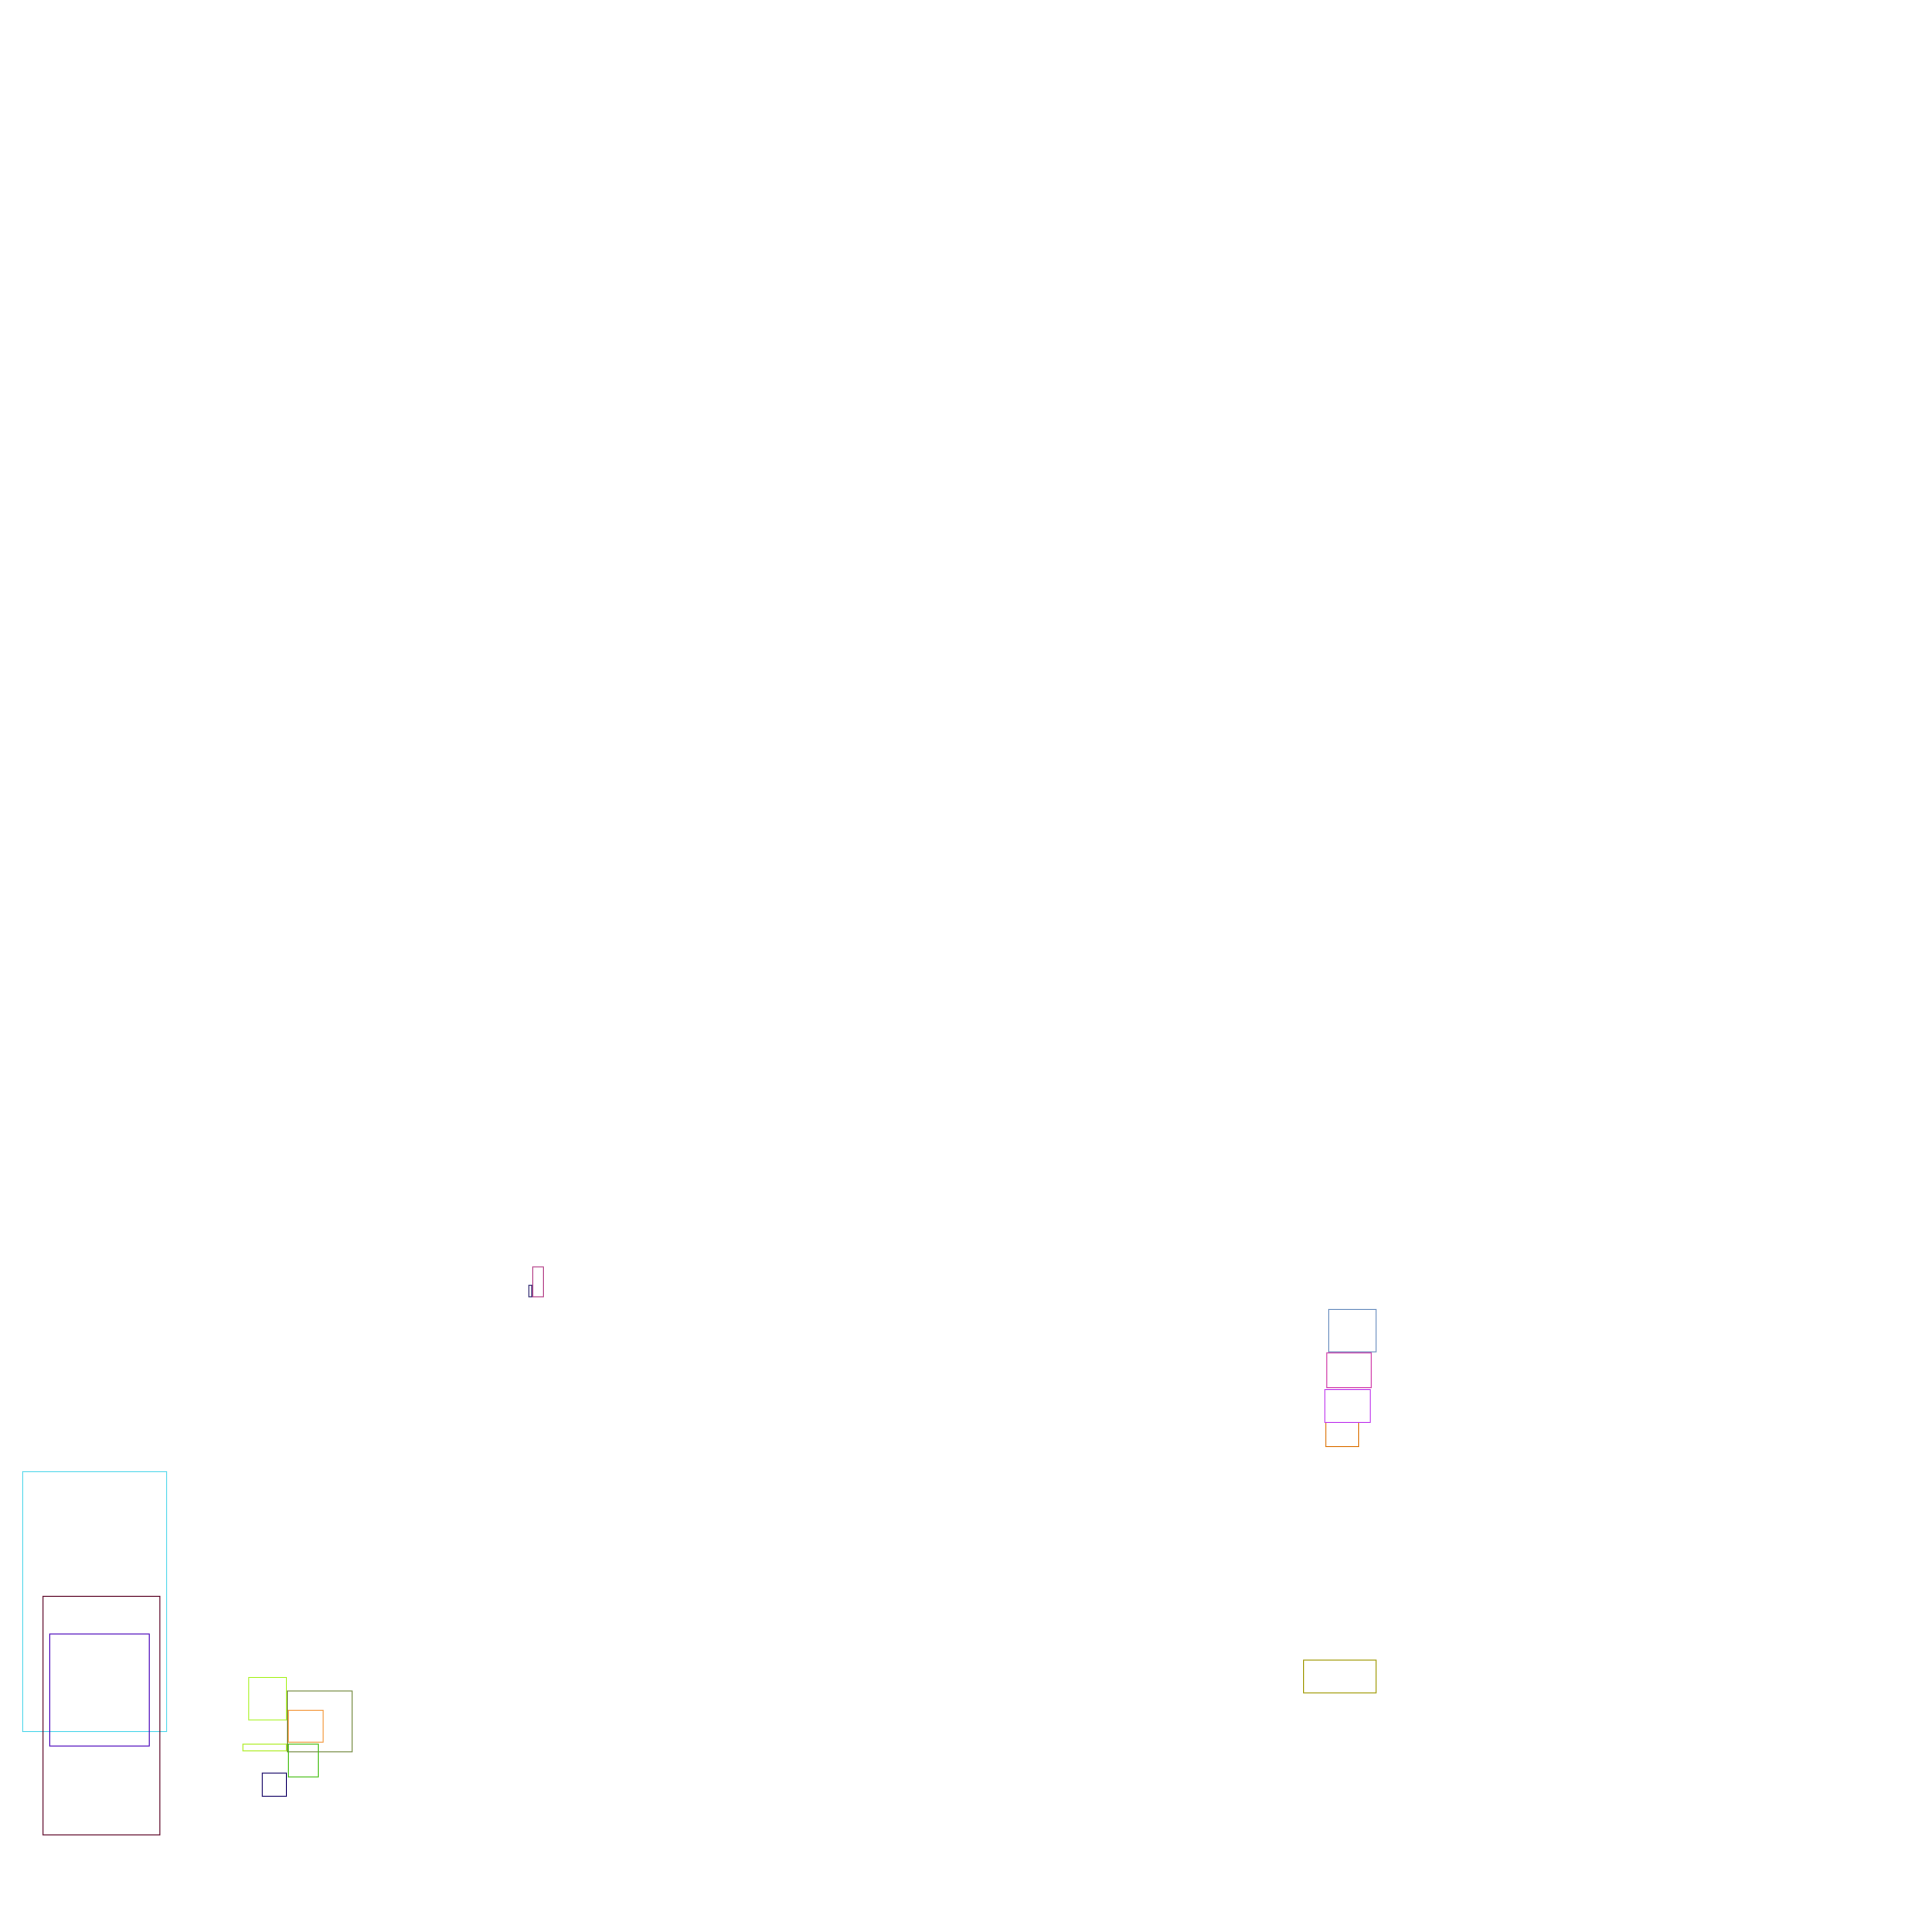

In [7]:
from PIL import Image
from src.visualization.visuialization_functions import hex_to_rgb

#Umwandlung in Pandas DataFrame, sollte hier aus Effizienzsicht nicht schlimm sein, da es nur wenige Mods gibt
#pandasMods = only_needed_columns.toPandas()
canvasdf5 = Image.new("RGB", (2000,2000), '#ffffff')

#Schrittweise Pixel im Canvas setzen
for index, row in pandasMdf5.iterrows():
    canvasdf5.putpixel((row['x'],row['y']), hex_to_rgb(row['pixel_color']))

canvasdf5.show()
canvasdf5.save('../reports/figures/mods-censors-canvas-df5.jpg')